# Ellipsoid fitting

Napari-stress implements several algorithms for ellipse fitting. They all have in common that they return a napari [vectors layer](https://napari.org/stable/howtos/layers/vectors.html) which represents the three major axes of the fitted ellipsoid. Napari-stress provides some further functionality to project the input pointcloud onto the surface of the fitted ellipsoid.

In [1]:
import napari_stress
import napari
import numpy as np

## Napari-stress implementation

This is a [least-squares](https://en.wikipedia.org/wiki/Least_squares) approach at ellipse fitting.

In [2]:
from napari_stress import approximation

In [3]:
pointcloud = napari_stress.get_droplet_point_cloud()[0][0][:, 1:]
ellipsoid = approximation.least_squares_ellipsoid(pointcloud)

Assistant skips harvesting pyclesperanto as it's not installed.


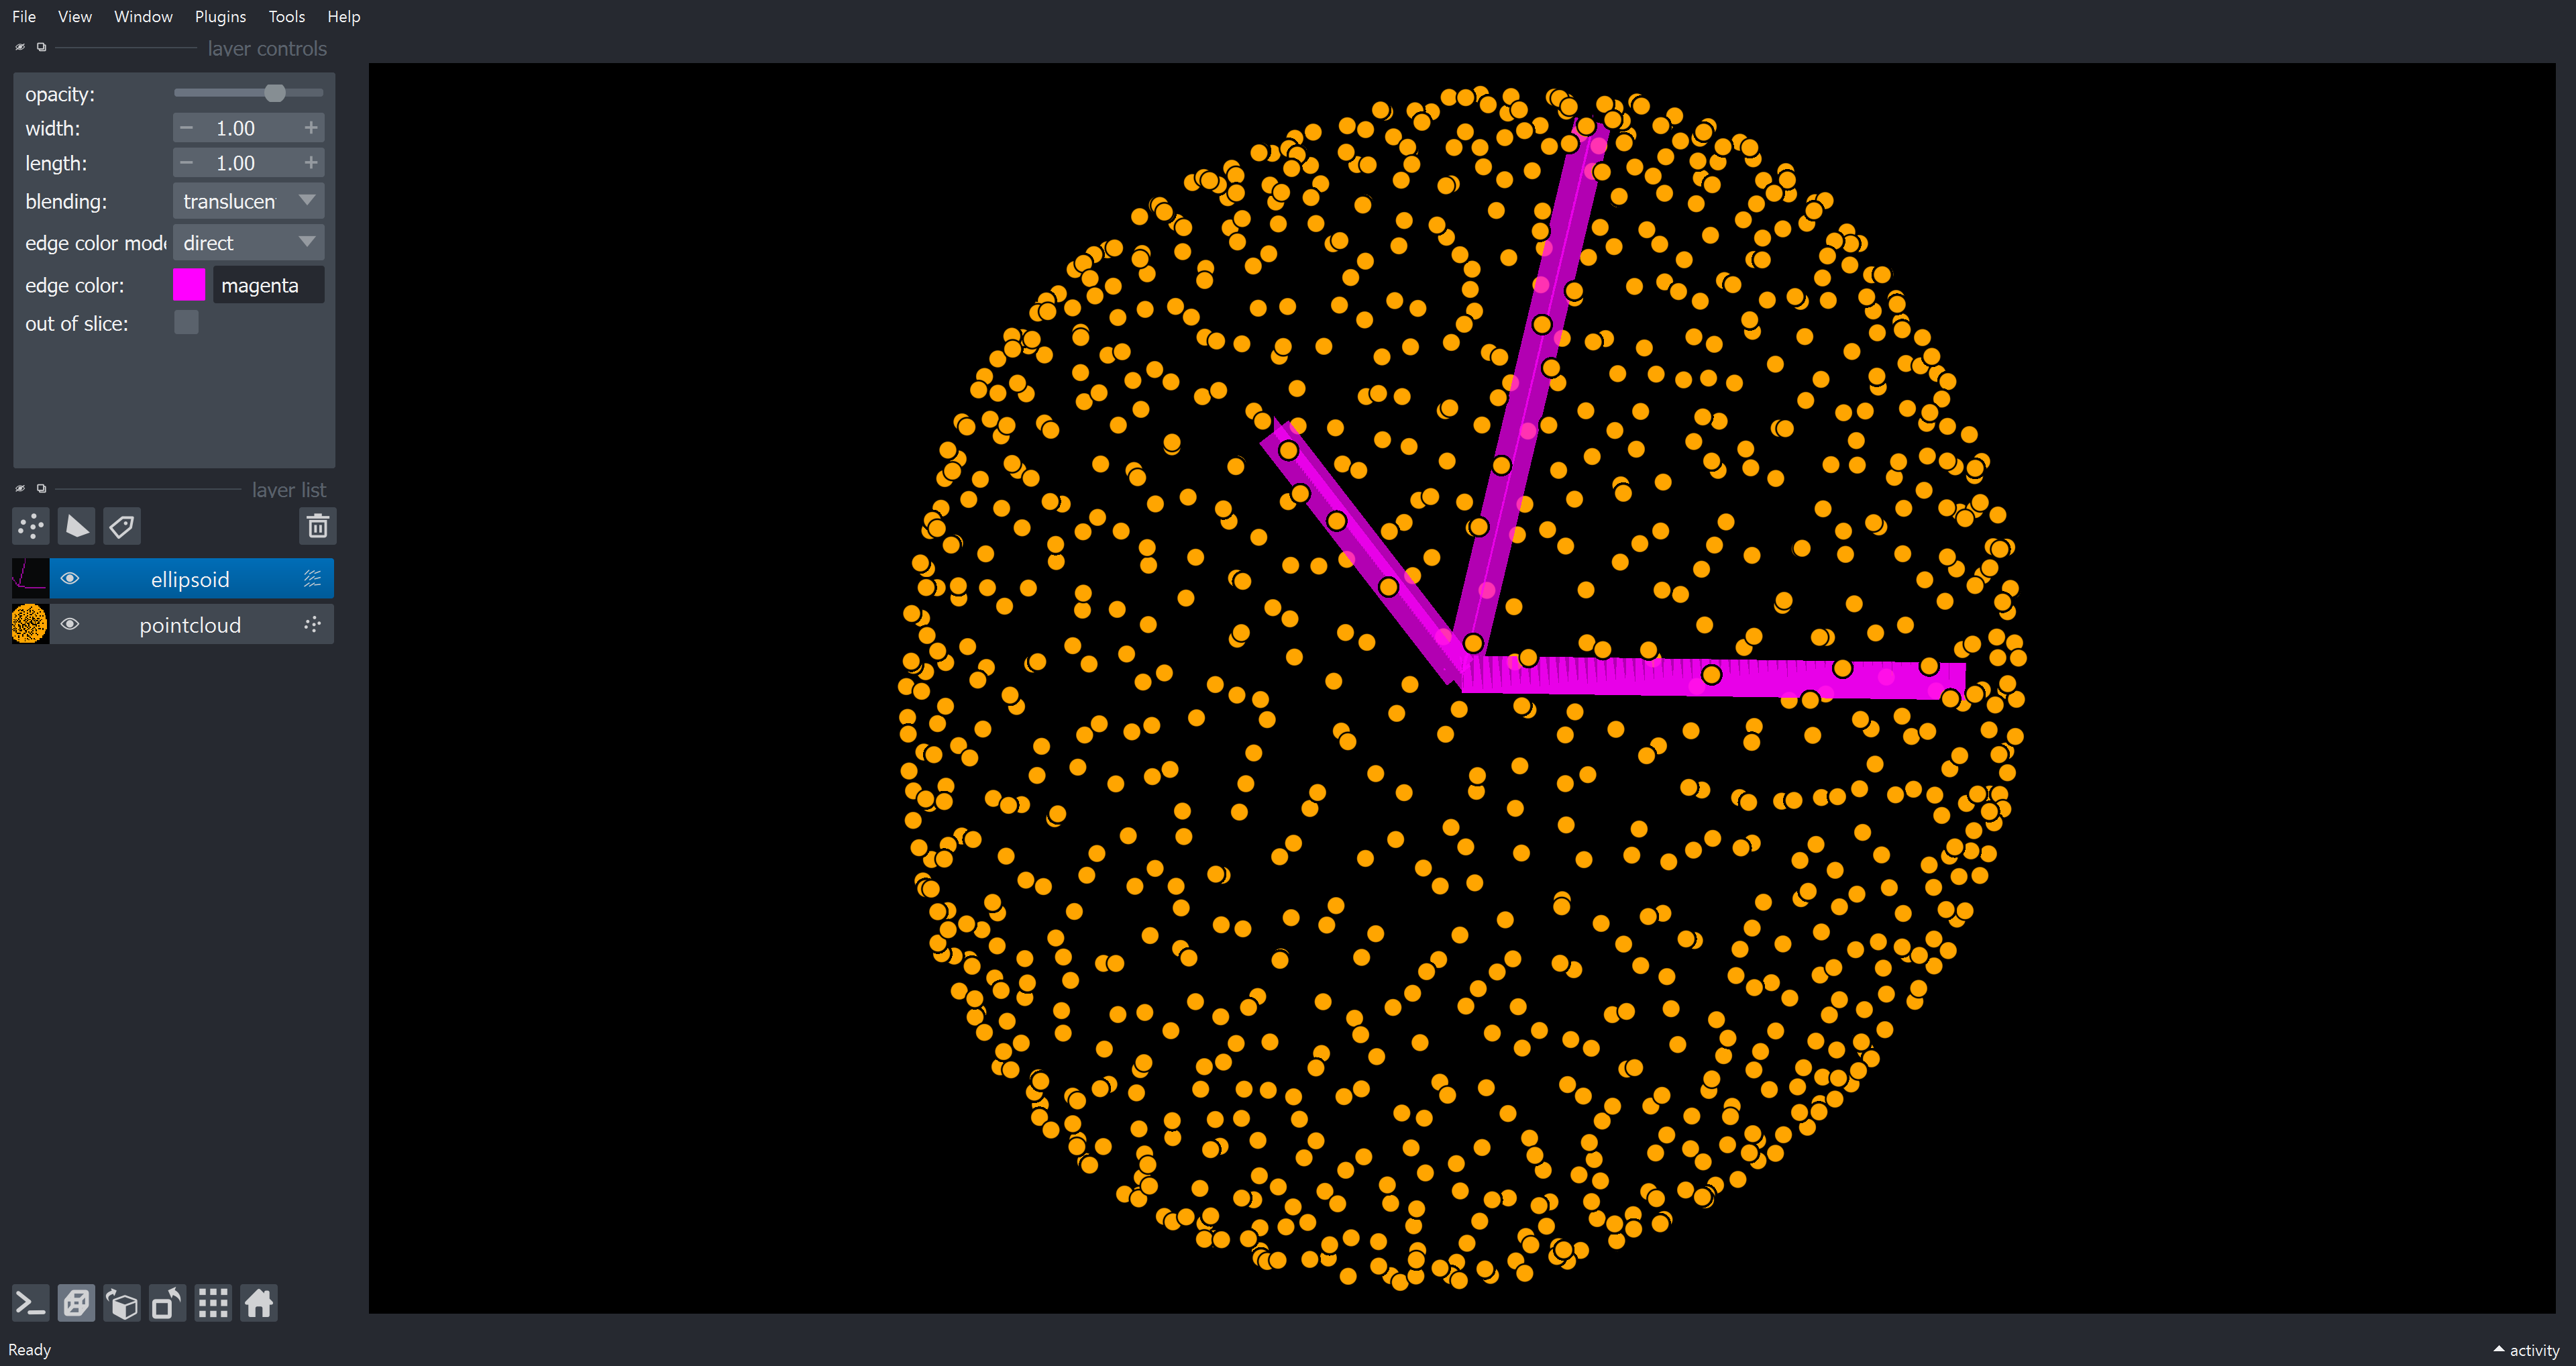

In [4]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_points(pointcloud, size=0.5, face_color='orange')
viewer.add_vectors(ellipsoid, edge_width=1, edge_color='magenta')
napari.utils.nbscreenshot(viewer)

To display, where the initial input points would fall on the surface of the fitted ellipse, use the `expand_points_on_ellipse()` function:

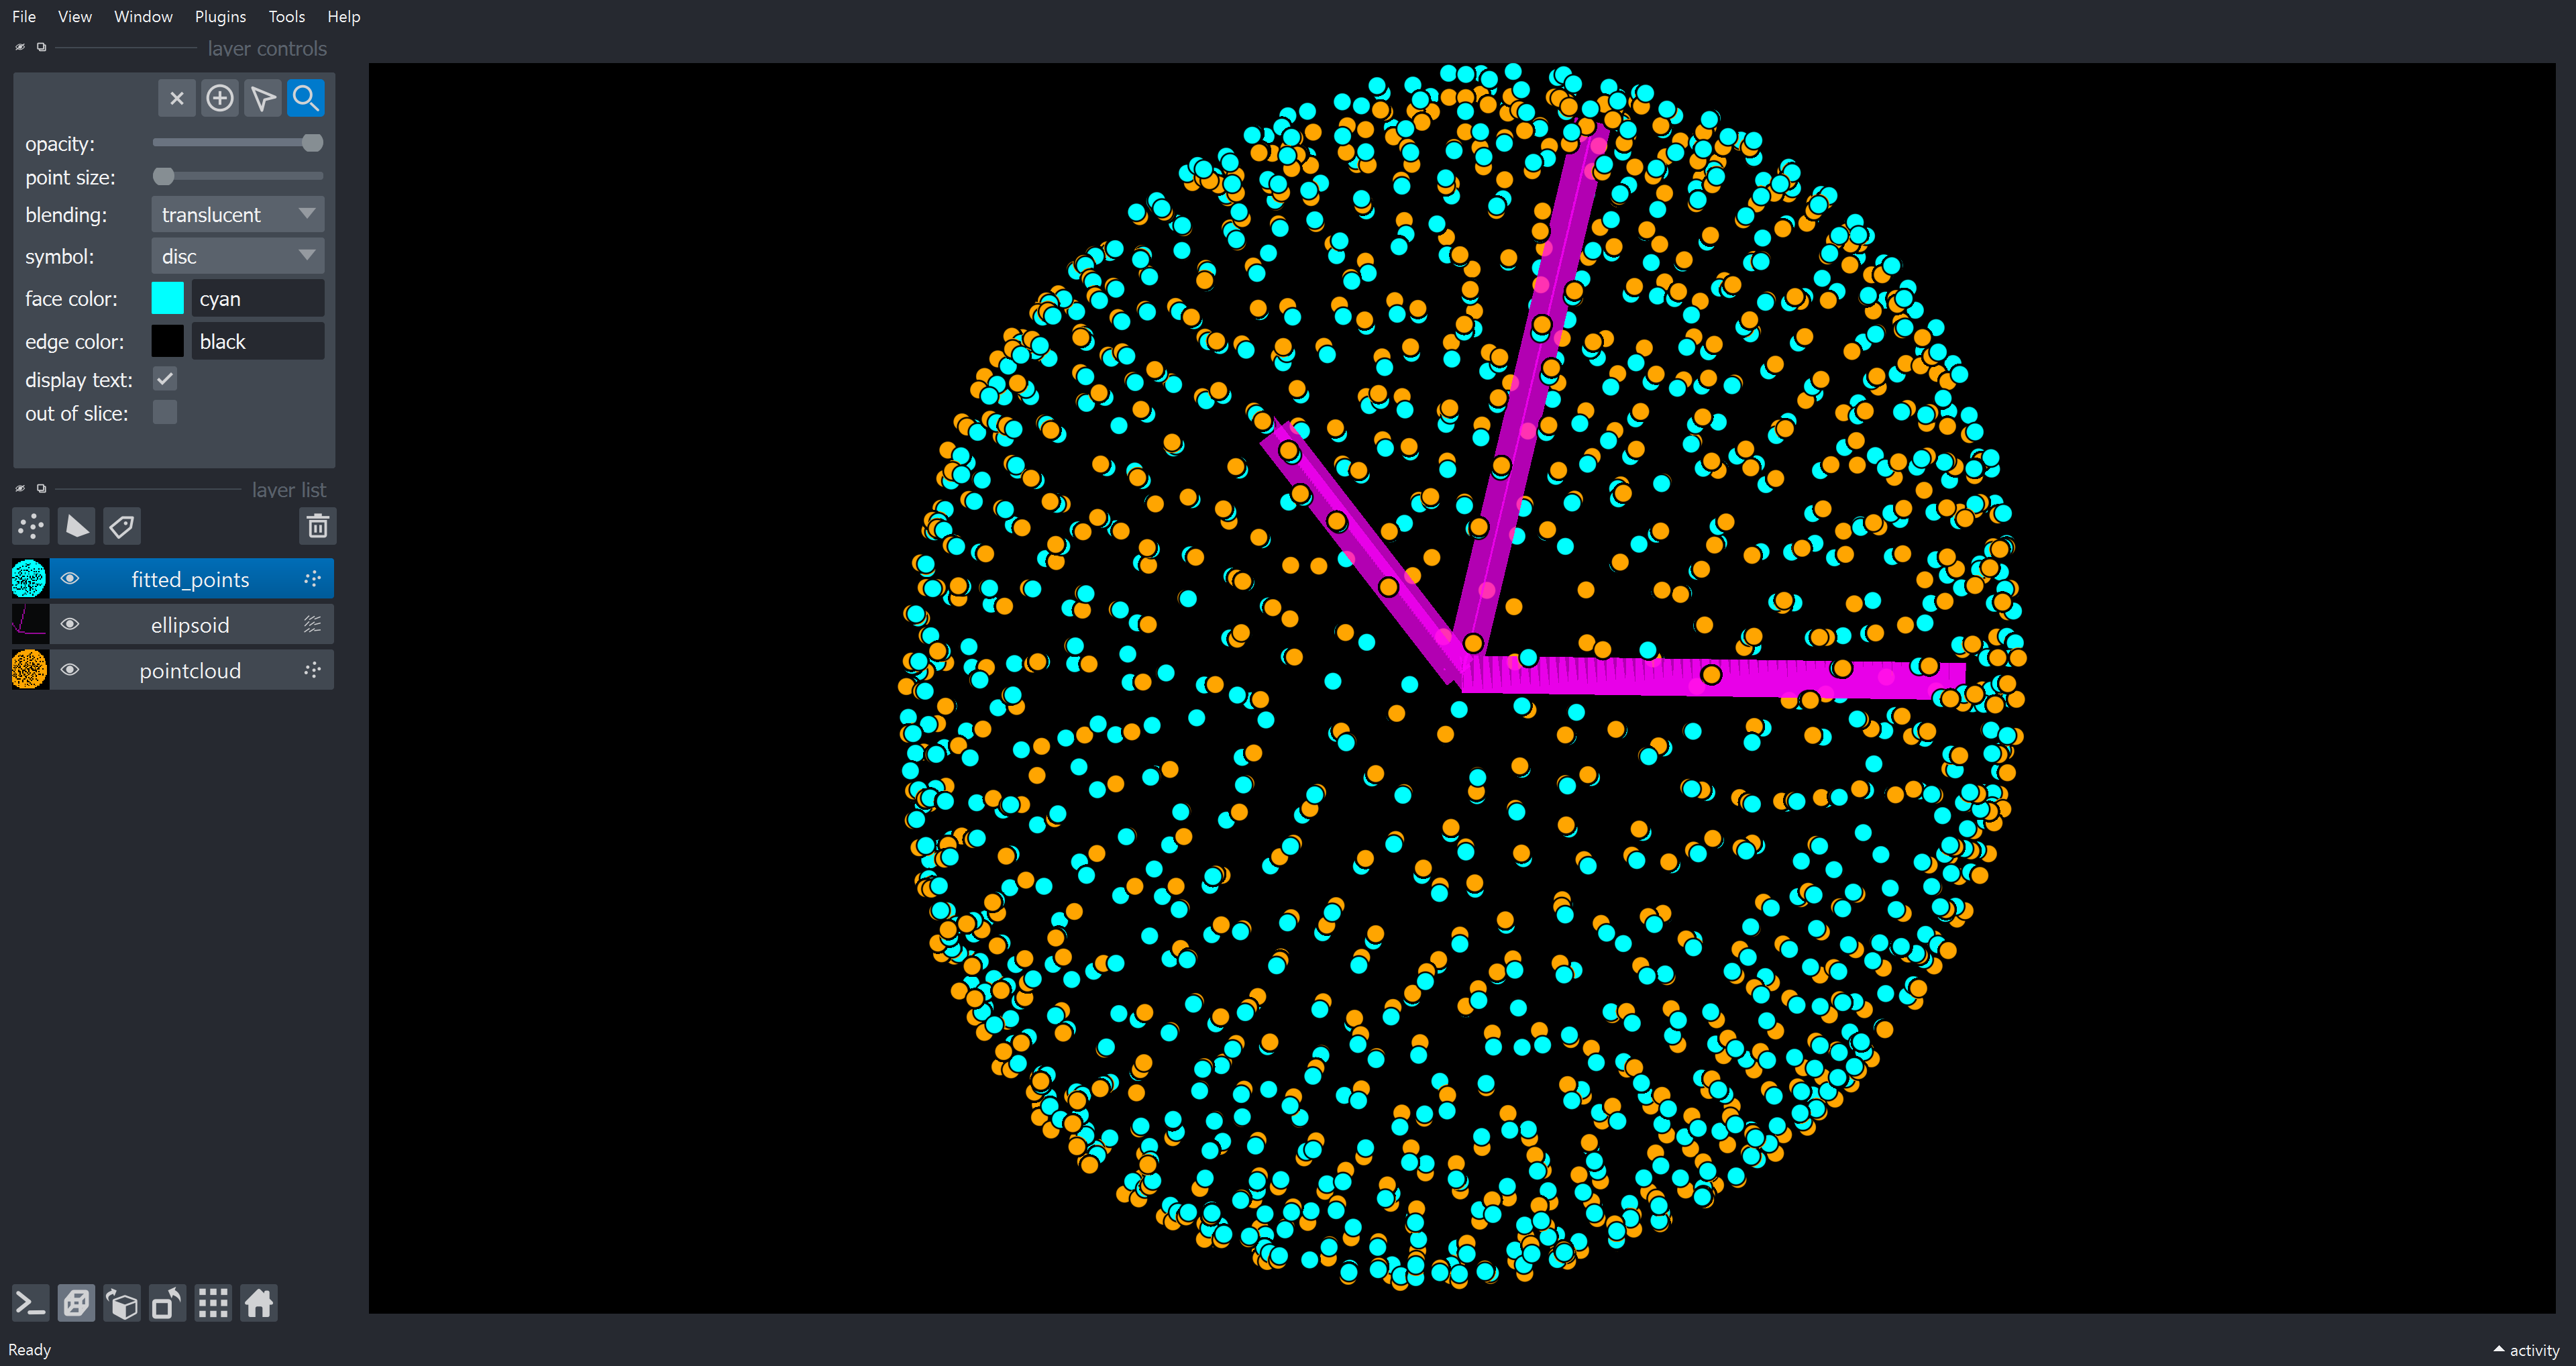

In [5]:
fitted_points = approximation.expand_points_on_ellipse(ellipsoid, pointcloud)
viewer.add_points(fitted_points, size=0.5, face_color='cyan')
napari.utils.nbscreenshot(viewer)

## Vedo implementation
This function re-implements the [respective function](https://vedo.embl.es/autodocs/content/vedo/pointcloud.html#vedo.pointcloud.pcaEllipsoid) from the vedo library. It applies a [PCA-algorithm](https://en.wikipedia.org/wiki/Principal_component_analysis) to a pointcloud to retrieve the major and minor axises of an ellipsoid, that comprises a set fraction of points within its volumne. The `inside_fraction` parameter controls how many points of the pointcloud will be located within the volume of the determined ellipsoid.

In [6]:
viewer2 = napari.Viewer(ndisplay=3)
viewer2.add_points(pointcloud, size=0.5, face_color='orange')

<Points layer 'pointcloud' at 0x1a434b10e20>

In [7]:
ellipsoid_vedo = napari_stress.fit_ellipsoid_to_pointcloud_vectors(pointcloud, inside_fraction=0.675)
fitted_points_vedo = approximation.expand_points_on_ellipse(ellipsoid_vedo, pointcloud)

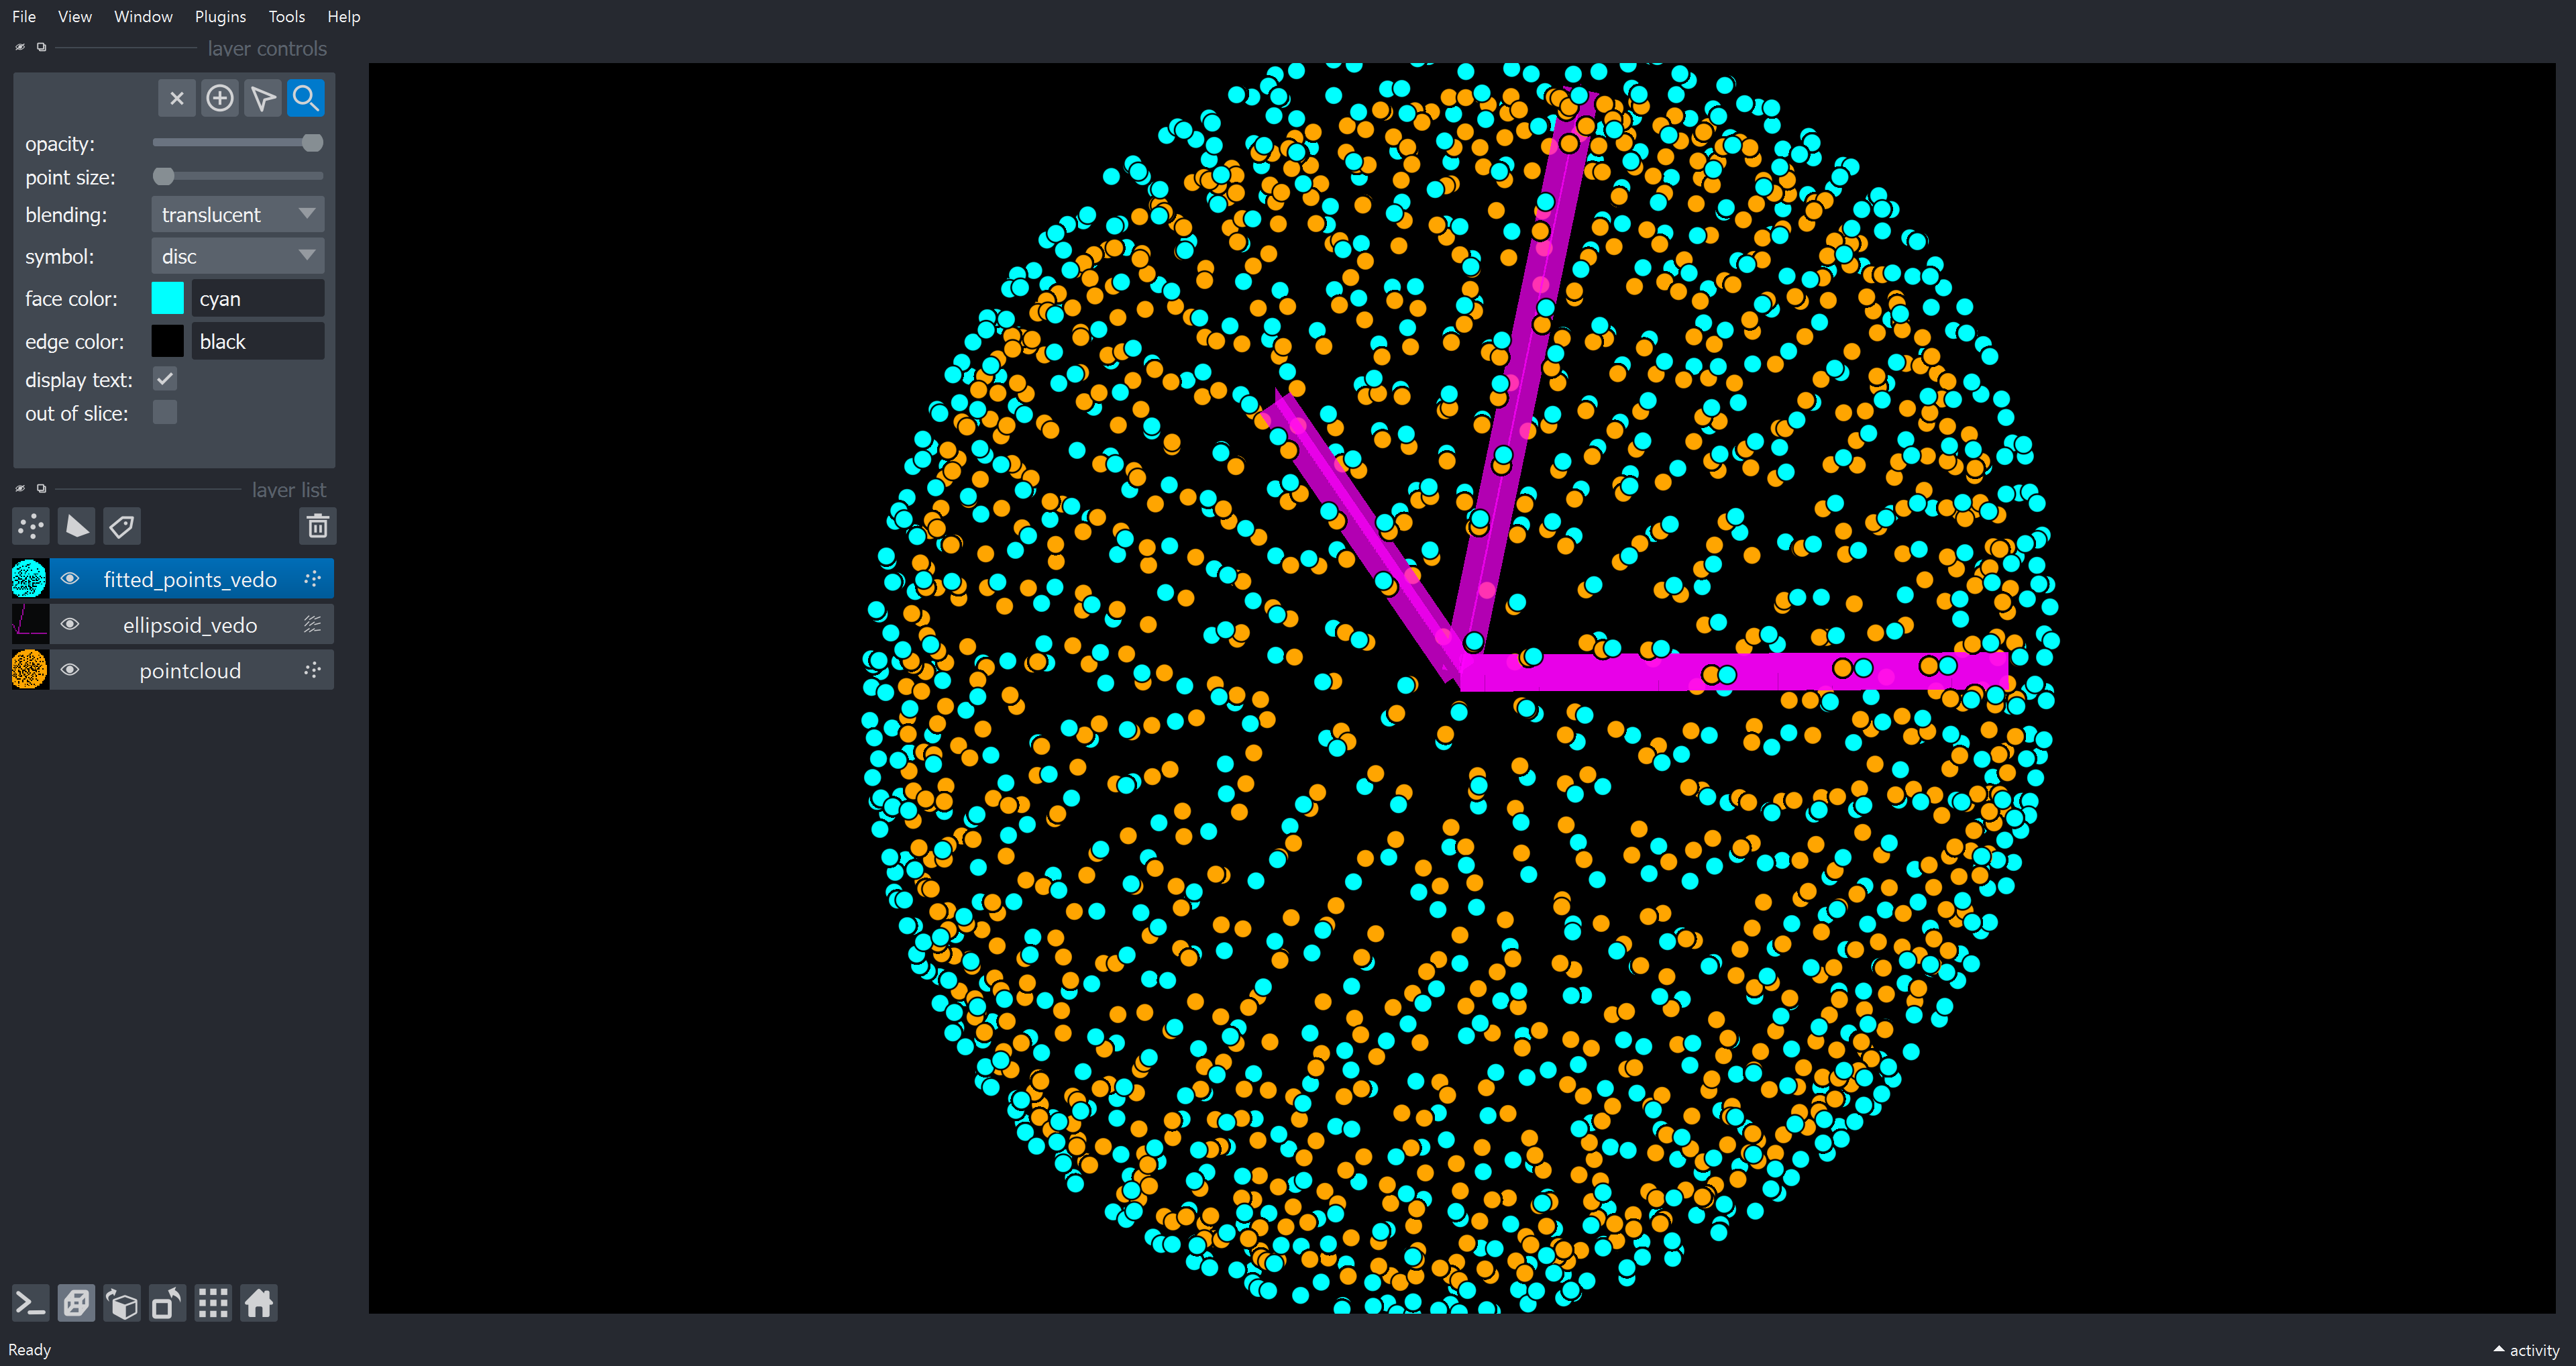

In [8]:
viewer2.add_vectors(ellipsoid_vedo, edge_width=1, edge_color='magenta')
viewer2.add_points(fitted_points_vedo, size=0.5, face_color='cyan')
napari.utils.nbscreenshot(viewer2)